In [5]:
import numpy as np
from scipy import stats

## 2.22: The shelf life problem

In [12]:
data = np.array([108, 124, 124, 106, 115, 138, 163, 159, 134, 139])
x_bar = data.mean()
s = data.std(ddof=1) # Make sure it is the sample std. dev.
print(f"The sample mean is {x_bar} and the sample standard deviation is {s}.")
(sum([(x_i - x_bar)**2 for x_i in data]) / (len(data)-1)) ** 0.5 # Sanity check

The sample mean is 131.0 and the sample standard deviation is 19.544820285692065.


19.544820285692065

### Hypotheses setup

$H_0: \mu = 120$

$H_1: \mu > 120$

One-sample t-test (one-sided) is used to test the hypotheses.

In [16]:
t_0, p_value = stats.ttest_1samp(data, 120)
p_value /= 2 # This is a one-sided test
print(f"The t-statistic is {t_0} and the P-value is {p_value}.")

The t-statistic is 1.7797582046490772 and the P-value is 0.054408873475079486.


In [15]:
# Hand calculation for verification
t_hand = (x_bar - 120) / (s / 10**0.5)
t_hand

1.7797582046490772

In [31]:
# Confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = abs(se * stats.t.ppf((1 - confidence) / 2, n-1))
    return m, m-h, m+h
mean_confidence_interval(data, 0.99)

(131.0, 110.91401815663062, 151.08598184336938)

## 2.24: The repair time problem

$H_0: \mu = 225$

$H_1: \mu > 225$

One-sample t-test (one-sided) is used to test the hypotheses.

In [33]:
data_2 = np.array([159, 224, 222, 149, 280, 379, 362, 260, 101, 179, 168, 485, 212, 264, 250, 170])
t_0_2, p_value_2 = stats.ttest_1samp(data_2, 225)
p_value_2 /= 2
print(f"The t-statistic is {t_0_2} and the P-value is {p_value_2}.")
mean_confidence_interval(data_2, 0.95)

The t-statistic is 0.6685176967463559 and the P-value is 0.2569800715875837.


(241.5, 188.89269031636067, 294.10730968363936)

In [39]:
t_hand = (data_2.mean() - 225) / (data_2.std(ddof=1) / 4)
t_hand

0.6685176967463559

In [40]:
# Another way to verify the statistical significance with alpha = 0.05
stats.t.ppf(0.05, 15)

-1.7530503556925552

## 2.26: Two machines comparison

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

Two-sample z-test (two-sided) is used to test the hypotheses.

($\sigma_1 = 0.015$ and $\sigma_2 = 0.018$)


In [46]:
# Exogenous variables
machine1 = np.array([16.03, 16.04, 16.05, 16.05, 16.02, 16.01, 15.96, 15.98, 16.02, 15.99])
machine2 = np.array([16.02, 15.97, 15.96, 16.01, 15.99, 16.03, 16.04, 16.02, 16.01, 16.00])
sigma1 = 0.015
sigma2 = 0.018
n1 = len(machine1)
n2 = len(machine2)

In [45]:
m1 = machine1.mean()
m2 = machine2.mean()
s1 = machine1.std(ddof=1)
s2 = machine2.std(ddof=1)
print(f"The sample mean for Machine 1 is {m1} with sample stdev of {s1}.")
print(f"The sample mean for Machine 2 is {m2} with sample stdev of {s2}.")

The sample mean for Machine 1 is 16.015 with sample stdev of 0.030276503540974792.
The sample mean for Machine 2 is 16.005000000000003 with sample stdev of 0.025495097567963653.


In [52]:
# SE mean and Z_0
sem = (sigma1**2/n1 + sigma2**2/n2)**0.5
z_0 = (m1 - m2) / sem
sem, z_0

(0.007409453421137081, 1.3496272169645915)

In [51]:
# Z_0.025 and the P-value
stats.norm.ppf(0.025), stats.norm.cdf(-z_0)

(-1.9599639845400545, 0.08856779466655013)

In [55]:
# 95% Confidence interval
0.01 - abs(stats.norm.ppf(0.025) * sem), 0.01 + abs(stats.norm.ppf(0.025) * sem)

(-0.004522261850555771, 0.02452226185055577)

## 2.29: Solid State Technology example

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \neq \mu_2$

Two-sample t-test (two-sided, paired) is used to test the hypotheses.


In [89]:
experiment1 = np.array([2.7, 4.6, 2.6, 3.0, 3.2, 3.8])
experiment2 = np.array([4.6, 3.4, 2.9, 3.5, 4.1, 5.1])
d = experiment1 - experiment2
d

array([-1.9,  1.2, -0.3, -0.5, -0.9, -1.3])

In [90]:
d_bar = d.mean()
s_d = d.std(ddof=1)
n = len(d)
sem = s_d / n**0.5
t_0 = d_bar / sem
d_bar, s_d, n, sem, t_0, stats.t.ppf(0.025, n-1)

(-0.6166666666666665,
 1.0590876576878168,
 6,
 0.4323707257024282,
 -1.4262451873096442,
 -2.57058183661474)

In [92]:
p_value = stats.t.cdf(t_0, n-1) * 2
p_value

0.21313249096350878

In [93]:
t_0, p_value = stats.ttest_rel(experiment1, experiment2)
t_0, p_value

(-1.4262451873096442, 0.21313249096350878)

Without pairing, the t-statistic and P-value become the following

In [94]:
x1_bar = experiment1.mean()
x2_bar = experiment2.mean()
s1 = experiment1.std(ddof=1)
s2 = experiment2.std(ddof=1)
n1 = len(experiment1)
n2 = len(experiment2)
sem = (s1**2/n1 + s2**2/n2) ** 0.5
t_0 = (x1_bar - x2_bar) / sem
var_n1 = s1**2/n1
var_n2 = s2**2/n2
df = (var_n1 + var_n2)**2 / (var_n1/(n1-1) + var_n2/(n2-1))
x1_bar, x2_bar, x1_bar - x2_bar, sem, t_0, df

(3.316666666666667,
 3.9333333333333336,
 -0.6166666666666667,
 0.4568612724035843,
 -1.3497897587649161,
 1.0436111111111104)

In [99]:
# t_alpha/2 value
stats.t.ppf(0.025, df)

-11.517648662712958

In [96]:
t, p = ttest_ind(a, b, equal_var=False)
t, p

(-1.349789758764916, 0.2070179434052791)

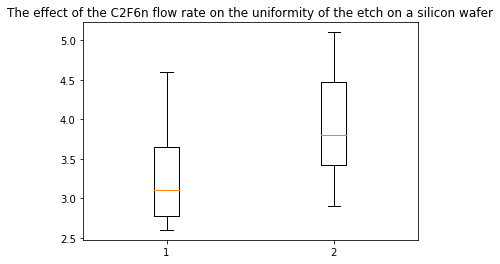

In [104]:
import matplotlib.pyplot as plt
plt.title("The effect of the C2F6n flow rate on the uniformity of the etch on a silicon wafer")
plt.boxplot([experiment1, experiment2])
plt.show()